In [49]:
import pandas as pd

# 1. Load the base DataFrame: Schema, and select needed columns
df_schema = pd.read_excel(
    r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - Schema.xlsx',
    sheet_name='schema',
    header=0,
    usecols=['Country', 'Region', 'Ceremonial County', 'Local Authority', 'Local Authority Type']
)


# 2. GDHI Excel: Table 2, get 'Local Authority' and '2022 Population'
df_gdhi_pop = pd.read_excel(
    r'C:\Users\sebas\Documents\UK Stats\UK - GDHI - Local Authorities.xlsx',
    sheet_name='Table 2',
    header=1,
    usecols=['Local Authority', '2022']
)

df_gdhi_pop.rename(columns={'2022': '2022 Population'}, inplace=True)



# 3. GDHI Excel again: Table 3, get 'Local Authority' and '2022 GDHI per head'
df_gdhi_per_head = pd.read_excel(
    r'C:\Users\sebas\Documents\UK Stats\UK - GDHI - Local Authorities.xlsx',
    sheet_name='Table 3',
    header=1,
    usecols=['Local Authority', '2022']
)

df_gdhi_per_head.rename(columns={'2022': '2022 GDHI per head'}, inplace=True)


# 4. GDP Excel: Data, get 'Local Authority' and '2022 GDP per head'
df_gdp_per_head = pd.read_excel(
    r'C:\Users\sebas\Documents\UK Stats\UK - GDP Per Head - Local Authorities.xlsx',
    sheet_name='Data',
    header=11,
)

df_gdp_per_head = df_gdp_per_head[['Local Authority', 2022]]
df_gdp_per_head.rename(columns={2022: '2022 GDP per head'}, inplace=True)

# 5. Merge (left joins) step by step on 'Local Authority'
df_merged = df_schema.merge(df_gdhi_pop, on='Local Authority', how='left')
df_merged = df_merged.merge(df_gdhi_per_head, on='Local Authority', how='left')
df_merged = df_merged.merge(df_gdp_per_head, on='Local Authority', how='left')

# 6. Save the final DataFrame to an Excel file
df_merged.to_excel(r'C:\Users\sebas\Documents\UK Stats\UK - LA Final Table.xlsx', index=False)


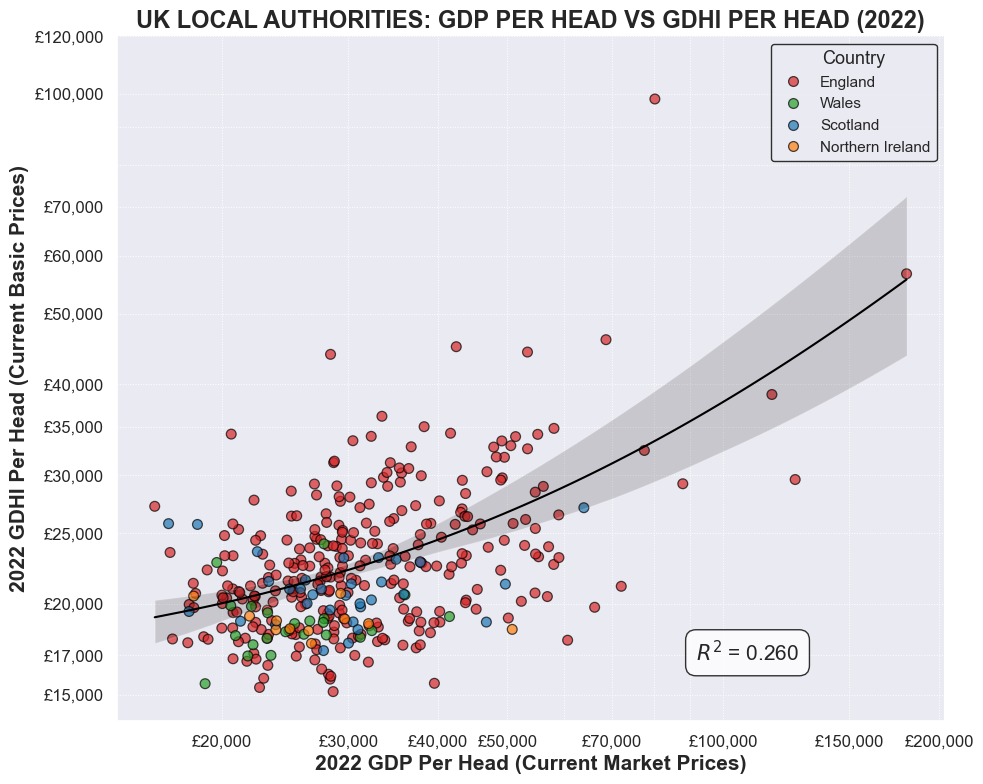

In [ ]:
# import libraries for visualization and analysis
import matplotlib.pyplot as plt 
from pandas import read_excel
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import r2_score    

# Load the final DataFrame
df = read_excel(r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - 2022.xlsx')

# Rename columns for clarity
x = df['2022 GDP per head (Current Market Prices)']
y = df['2022 GDHI per head (Current Basic Prices)']

# Custom color palette for countries
custom_palette = {
    'England': 'tab:red',
    'Scotland': 'tab:blue',
    'Wales': 'tab:green',
    'Northern Ireland': 'tab:orange'
}

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.set_theme(style='darkgrid')

# Scatter plot with customizations
sns.scatterplot(data=df,
                x='2022 GDP per head (Current Market Prices)',
                y='2022 GDHI per head (Current Basic Prices)',
                hue='Country',
                palette=custom_palette,
                s=50,
                edgecolor='black',
                linewidth=0.9,
                alpha=0.7,
                legend='full'
)

# Linear Regression
sns.regplot(
    data=df,
    x='2022 GDP per head (Current Market Prices)',  
    y='2022 GDHI per head (Current Basic Prices)',  
    scatter=False,
    line_kws={
        'color': 'black', 
        'linewidth': 1.5, 
        'linestyle': '-'
    },
    ci=95,
)

# Calculate R²
mask = ~(x.isna() | y.isna())
x_vals = x[mask].values.reshape(-1, 1)
y_vals = y[mask].values
reg = LinearRegression().fit(x_vals, y_vals)
r2 = r2_score(y_vals, reg.predict(x_vals))

# Annotate R² on the plot with a box
plt.text(
    0.7, 0.1,
    f'$R^2$ = {r2:.3f}',
    fontsize=15,
    ha='left',
    va='center',
    transform=plt.gca().transAxes,
    bbox=dict(
        facecolor='white', 
        edgecolor='black', 
        boxstyle='round,pad=0.5', 
        alpha=0.8
    )
)

# Set both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Custom ticks and labels
import matplotlib.ticker as mticker

# Define ticks
x_ticks = [20_000, 30_000, 40_000, 50_000, 70_000, 100_000, 150_000, 200_000]
y_ticks = [15_000, 17_000, 20_000, 25_000, 30_000, 35_000, 40_000, 50_000, 60_000, 70_000, 100_000, 120_000]

# Set ticks and labels
plt.gca().set_xticks(x_ticks)
plt.gca().set_yticks(y_ticks)

# Format tick labels as currency
plt.gca().set_xticklabels([f'£{x:,.0f}' for x in x_ticks], fontsize=12)
plt.gca().set_yticklabels([f'£{y:,.0f}' for y in y_ticks], fontsize=12)

# Add grid lines
plt.grid(True, which='both', axis='both', linestyle=':', linewidth=0.7, alpha=1.0)

# Titles and labels
plt.title('UK LOCAL AUTHORITIES: GDP PER HEAD VS GDHI PER HEAD (2022)', fontsize=17, fontweight='bold')
plt.xlabel('2022 GDP Per Head (Current Market Prices)', fontsize=15, fontweight='bold')
plt.ylabel('2022 GDHI Per Head (Current Basic Prices)', fontsize=15, fontweight='bold')

# Legend
plt.legend(
    title='Country', 
    title_fontsize='13', 
    fontsize='11', 
    loc='upper right', 
    frameon=True, 
    edgecolor='black'
    )

# Adjust layout and show plot
plt.tight_layout()
sns.despine()   
plt.show()


In [76]:
import statsmodels.api as sm

df = read_excel(r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - 2022.xlsx')

# Select only rows where both X and y are not missing
subset = df[['2022 GDP per head (Current Market Prices)', '2022 GDHI per head (Current Basic Prices)']].dropna()

X = subset['2022 GDP per head (Current Market Prices)']
y = subset['2022 GDHI per head (Current Basic Prices)']

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const)
results = model.fit()

print(results.summary())

                                        OLS Regression Results                                       
Dep. Variable:     2022 GDHI per head (Current Basic Prices)   R-squared:                       0.260
Model:                                                   OLS   Adj. R-squared:                  0.258
Method:                                        Least Squares   F-statistic:                     125.4
Date:                                       Sat, 27 Sep 2025   Prob (F-statistic):           3.77e-25
Time:                                               23:17:52   Log-Likelihood:                -3614.9
No. Observations:                                        359   AIC:                             7234.
Df Residuals:                                            357   BIC:                             7242.
Df Model:                                                  1                                         
Covariance Type:                                   nonrobust                      

In [ ]:
import pandas as pd
from openpyxl import load_workbook  

df = pd.read_excel(
    r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - 2022.xlsx',
    sheet_name='schema',
    header=0
)

df_gdhi_ranked = df.sort_values(by='2022 GDHI per head (Current Basic Prices)', ascending=False)

print(df_gdhi_ranked.head())

with pd.ExcelWriter(
    r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - 2022.xlsx', 
    engine='openpyxl', 
    mode='a', 
    if_sheet_exists='replace'
) as writer:
    df_gdhi_ranked.to_excel(
        writer, 
        sheet_name='gdhi_ranked', 
        index=False)
    
print("New sheet 'gdhi_ranked' added to the existing Excel file.")


     Country  Region Lieutenancy Area         Local Authority  \
175  England  London   Greater London          City of London   
173  England  London   Greater London  Kensington and Chelsea   
176  England  London   Greater London             Westminster   
177  England  London   Greater London                  Camden   
172  England  London   Greater London  Hammersmith and Fulham   

      Local Authority Type  2022 Population  \
175  Sui Generis Authority            11457   
173         London Borough           146392   
176         London Borough           209866   
177         London Borough           217365   
172         London Borough           185506   

     2022 GDHI per head (Current Basic Prices)  \
175                                     144079   
173                                      98459   
176                                      71011   
177                                      56704   
172                                      46050   

     2022 GDP per head (C

In [8]:
df = pd.read_excel(
    r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - 2022.xlsx',
    sheet_name='schema',
    header=0
)

df_gdp_ranked = df.sort_values(by='2022 GDP per head (Current Market Prices)', ascending=False)

with pd.ExcelWriter(
    r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - 2022.xlsx', 
    engine='openpyxl', 
    mode='a', 
    if_sheet_exists='replace'
) as writer:
    df_gdp_ranked.to_excel(
        writer, 
        sheet_name='gdp_ranked', 
        index=False)
    
print("New sheet 'gdp_ranked' added to the existing Excel file.")

New sheet 'gdp_ranked' added to the existing Excel file.


In [10]:
df = pd.read_excel(
  r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - 2022.xlsx',
    sheet_name='schema',
    header=0
)

df_region_ranked = df.sort_values(
    by=['Region', '2022 GDHI per head (Current Basic Prices)'],
    ascending=[True, False]
)

with pd.ExcelWriter(
    r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - 2022.xlsx', 
    engine='openpyxl', 
    mode='a', 
    if_sheet_exists='replace'
) as writer:
    df_region_ranked.to_excel(
        writer, 
        sheet_name='region_gdhi', 
        index=False)
    
print("New sheet 'region_gdhi' added to the existing Excel file.")

New sheet 'region_gdhi' added to the existing Excel file.


In [12]:
df = pd.read_excel(
    r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - 2022.xlsx',
    sheet_name='schema',
    header=0
)

df_england = df[df['Country'] == 'England']

df_england_ranked = df_england.sort_values(
    by=['Lieutenancy Area', '2022 GDHI per head (Current Basic Prices)'],
    ascending=[True, False]
)

with pd.ExcelWriter(
    r'C:\Users\sebas\Documents\UK Stats\UK - Local Authorities - 2022.xlsx', 
    engine='openpyxl', 
    mode='a', 
    if_sheet_exists='replace'
) as writer:
    df_england_ranked.to_excel(
        writer, 
        sheet_name='cc_gdhi', 
        index=False)
    
print("New sheet 'cc_gdhi' added to the existing Excel file.")


New sheet 'cc_gdhi' added to the existing Excel file.
